In [25]:
%matplotlib inline

import locale

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

_=locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

# Load the data

In [2]:
fileName = 'survey_results_public.csv'
df_raw = pd.read_csv(fileName, delimiter=',', header=0)
#display(df_raw.head())

# Filter

In [3]:
df = df_raw[df_raw['Country'] == 'United States']
df = df[df['Salary'] > 1]
df = df[df['FormalEducation'] == 'Master\'s degree']
df = df[(df['YearsCodedJob'] == '3 to 4 years') | (df['YearsCodedJob'] == '4 to 5 years')| (df['YearsCodedJob'] == '5 to 6 years')]
#df = df[(df['YearsCodedJob'] == '4 to 5 years')| (df['YearsCodedJob'] == '5 to 6 years')]
df = df[df['Professional'] == 'Professional developer']
df = df[df['EmploymentStatus'] == 'Employed full-time']
#df = df[df['CompanySize'] == '10,000 or more employees']
print(len(df))

123


In [4]:
#display(df.sort_values('Salary', ascending=True))

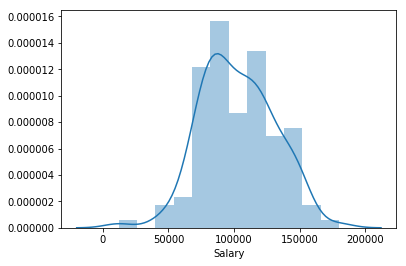

In [5]:
_=sns.distplot(df['Salary'])

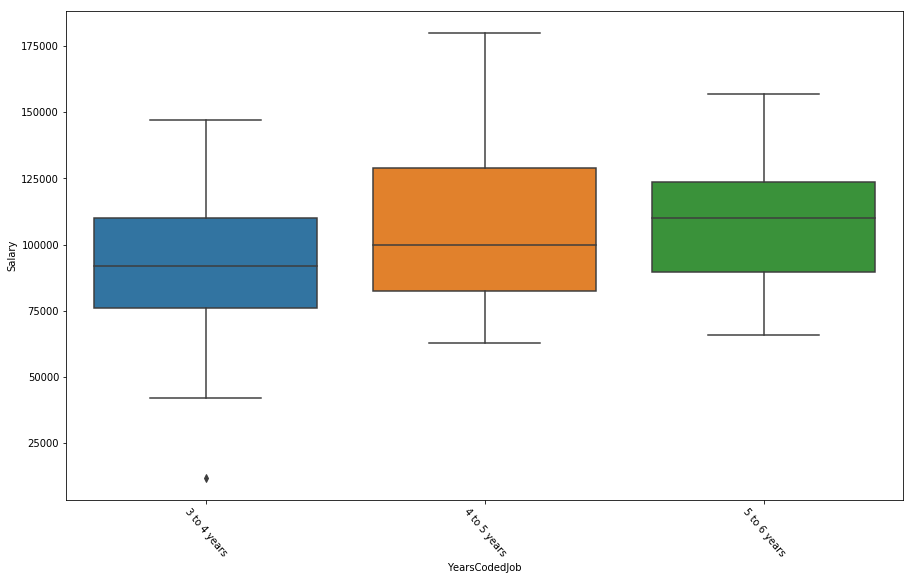

In [11]:
plt.figure(figsize=(15,9))
g=sns.boxplot(x="YearsCodedJob", y="Salary", data=df)

locs, labels = plt.xticks()
_=g.set_xticklabels(labels, rotation=-50)

In [33]:
def printSalaryPercentiles(ns):
    for n in ns:
        wage = locale.currency(np.percentile(df['Salary'], n), grouping=True)
        print("{n}th percentile: {wage}".format(n = n, wage = wage))

In [32]:
printSalaryPercentiles([25,50,67,75])

25th percentile: $83,000.00
50th percentile: $100,000.00
67th percentile: $115,000.00
75th percentile: $120,500.00
